<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2Fjeahyuk/jeahyuk/SVD%EC%99%80_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import cv2
import matplotlib as mpl

import matplotlib.pyplot as plt


# 2차원

In [2]:
X = 5 * np.random.rand(30,1)
y = 4 + 1.2 * X + np.random.randn(30,1)

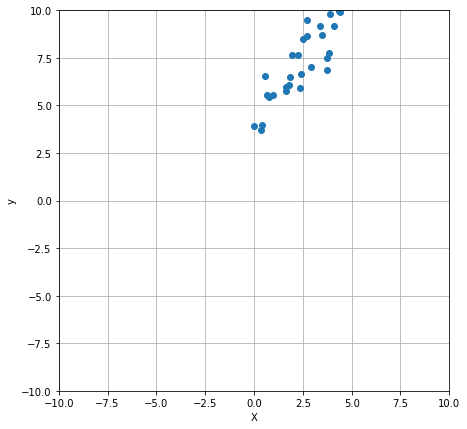

In [3]:
fig, ax = plt.subplots(figsize=(7,7))

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

plt.plot(X,y,'o')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

In [4]:
data = pd.DataFrame({"X" : X[:,0], "y" : y[:,0]})

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_D= pca.fit_transform(data)

In [6]:
pca.explained_variance_ratio_

array([0.94942031, 0.05057969])

In [9]:
pca.components_
# 주성분 벡터

array([[-0.55387933, -0.83259695],
       [ 0.83259695, -0.55387933]])

In [10]:
pca.mean_
# 데이터의 평균값

array([2.47786835, 7.36487532])

#2차원 고유값 분해

In [31]:
np.linalg.eig(data)

LinAlgError: ignored

# 3차원

In [14]:

x = 5 * np.random.rand(100,1)
y = 2 + 2 * x + np.random.randn(100,1)
z = 5 + x  + np.random.randn(100,1)

In [16]:
data3=pd.DataFrame({'x' : x[:,0],'y' : y[:,0],'z' : z[:,0]})

In [17]:
pca3 = PCA(n_components=3)
data_D= pca3.fit_transform(data3)

In [19]:
pca3.components_
# 주성분 벡터

array([[ 0.38039496,  0.86199833,  0.33505008],
       [-0.07197757,  0.38878063, -0.91851448],
       [-0.92201893,  0.32528219,  0.20993474]])

In [23]:
pca3.mean_
# 데이터의 평균값

array([2.55470831, 7.03997307, 7.56751015])

In [20]:
X=data3

단위행렬 (Unit matrix): np.eye(n) \\
대각행렬 (Diagonal matrix): np.diag(x) \\
내적 (Dot product, Inner product): np.dot
(a, b) \\
대각합 (Trace): np.trace(x) \\
행렬식 (Matrix Determinant): np.linalg.det(x) \\
역행렬 (Inverse of a matrix): np.linalg.inv(x) \\
고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x) \\
특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A) \\
연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b) \\
최소자승 해 풀기 (Compute the Least-squares solution): m, c = np.linalg.lstsq(A, y, rcond=None)[0] \\

\\

출처: https://rfriend.tistory.com/380 [R, Python 분석과 프로그래밍의 친구 (by R Friend):티스토리]

U는 $ AA^T $를 고유값분해하여 얻은 직교행렬(orthogonal matrix)이다.

V는 $ A^TA $를 고유값 분해하여 얻은 직교행렬이다.

$ \Sigma $는 고유값분해에서 나온 고유값들을 $ \surd $한 것


$$ AA^T=U\Sigma V^T(U\Sigma V^T) \\
\ \ \ \ \ \ \ = U\Sigma V^TV\Sigma^T U^T \\
= U\Sigma \Sigma^T U^T \\
\ \ = U(\Sigma \Sigma^T) U^T \\
$$


In [29]:
X

,x,y,z
0,2.930872,7.954111,8.223922
1,2.981481,7.815759,7.514928
2,3.096451,8.307012,9.542442
3,4.882780,11.371633,8.694119
4,0.008966,3.799736,6.578685
...,...,...,...
95,4.158637,11.772932,8.927325
96,2.444408,6.466022,5.999946
97,3.030429,8.489304,8.762227
98,1.916000,5.916886,5.270652


#특이값 분해

In [33]:
U1, S1, VT1 = np.linalg.svd(X)


In [34]:
U1

array([[-1.05661346e-01, -1.39576770e-02, -4.18290515e-03, ...,
        -9.78702603e-02, -6.18477938e-02,  1.97793903e-02],
       [-1.00606458e-01,  1.12657161e-02,  8.98406563e-03, ...,
        -5.20371082e-02, -7.09102173e-02, -8.83353756e-02],
       [-1.16243870e-01, -5.32091362e-02,  1.06684551e-02, ...,
        -3.42242813e-02,  1.60098458e-02, -1.93135298e-01],
       ...,
       [-1.12455294e-01, -1.59129897e-02, -2.21256690e-02, ...,
         9.88452343e-01, -8.07358897e-03, -6.39397672e-03],
       [-7.28308817e-02,  2.00315509e-02, -5.82186482e-02, ...,
        -8.03719001e-03,  9.91636870e-01, -4.47784257e-04],
       [-4.64704965e-02, -2.04090323e-01, -4.83626372e-02, ...,
        -8.41017803e-03, -1.88805970e-03,  9.56675302e-01]])

In [35]:
S1

array([111.75326159,  17.76154385,   5.12484822])

In [36]:
VT1

array([[-0.25612406, -0.68581744, -0.68121576],
       [ 0.29738254,  0.6146407 , -0.73060279],
       [ 0.91976306, -0.38970663,  0.04652586]])

In [21]:
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

# array([[ 0.38039496,  0.86199833,  0.33505008],
#        [-0.07197757,  0.38878063, -0.91851448],
#        [-0.92201893,  0.32528219,  0.20993474]])

array([[-0.38039496, -0.86199833, -0.33505008],
       [ 0.07197757, -0.38878063,  0.91851448],
       [ 0.92201893, -0.32528219, -0.20993474]])

In [32]:
X0

,x,y,z
0,0.376164,0.914138,0.656412
1,0.426773,0.775785,-0.052582
2,0.541743,1.267039,1.974932
3,2.328071,4.331660,1.126608
4,-2.545743,-3.240237,-0.988826
...,...,...,...
95,1.603928,4.732959,1.359814
96,-0.110300,-0.573951,-1.567564
97,0.475721,1.449331,1.194717
98,-0.638708,-1.123087,-2.296858


In [28]:
S

array([37.1302226 ,  9.83350083,  4.43624672])

In [22]:
VT[:, 0]

array([-0.38039496,  0.07197757,  0.92201893])

In [24]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [26]:
W

array([1378.65343027,   19.680285  ,   96.69773865])

In [27]:
V

array([[ 0.38039496,  0.92201893,  0.07197757],
       [ 0.86199833, -0.32528219, -0.38878063],
       [ 0.33505008, -0.20993474,  0.91851448]])

# 300개 과일 데이터

In [37]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-24 11:39:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-24 11:39:59--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-24 11:39:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [38]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [40]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

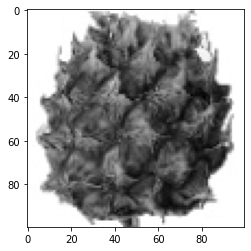

In [57]:
plt.imshow(fruits[150], cmap='gray_r')
plt.show()

In [60]:
A=fruits[150]
A

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [65]:
A0 = A - A.mean(axis=0)
U, S, VT = np.linalg.svd(X0)

In [66]:
VT

array([[-0.38039496, -0.86199833, -0.33505008],
       [ 0.07197757, -0.38878063,  0.91851448],
       [ 0.92201893, -0.32528219, -0.20993474]])